In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
import warnings

warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("employees.csv")

In [4]:
df

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,Male,8/6/1993,12:42 PM,97308,6.945,True,Marketing
1,Thomas,Male,3/31/1996,6:53 AM,61933,4.170,True,NaN
2,Maria,Female,4/23/1993,11:17 AM,130590,11.858,False,Finance
3,Jerry,Male,3/4/2005,1:00 PM,138705,9.340,True,Finance
4,Larry,Male,1/24/1998,4:47 PM,101004,1.389,True,Client Services
...,...,...,...,...,...,...,...,...
995,Henry,NaN,11/23/2014,6:09 AM,132483,16.655,False,Distribution
996,Phillip,Male,1/31/1984,6:30 AM,42392,19.675,False,Finance
997,Russell,Male,5/20/2013,12:39 PM,96914,1.421,False,Product
998,Larry,Male,4/20/2013,4:45 PM,60500,11.985,False,Business Development


In [5]:
df.shape

(1000, 8)

In [7]:
df.columns

Index(['First Name', 'Gender', 'Start Date', 'Last Login Time', 'Salary',
       'Bonus %', 'Senior Management', 'Team'],
      dtype='object')

In [8]:
df.describe()

,Salary,Bonus %
count,1000.000000,1000.000000
mean,90662.181000,10.207555
std,32923.693342,5.528481
min,35013.000000,1.015000
25%,62613.000000,5.401750
50%,90428.000000,9.838500
75%,118740.250000,14.838000
max,149908.000000,19.944000


In [10]:
df.head()

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,Male,8/6/1993,12:42 PM,97308,6.945,True,Marketing
1,Thomas,Male,3/31/1996,6:53 AM,61933,4.170,True,NaN
2,Maria,Female,4/23/1993,11:17 AM,130590,11.858,False,Finance
3,Jerry,Male,3/4/2005,1:00 PM,138705,9.340,True,Finance
4,Larry,Male,1/24/1998,4:47 PM,101004,1.389,True,Client Services


In [12]:
df.tail()

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
995,Henry,NaN,11/23/2014,6:09 AM,132483,16.655,False,Distribution
996,Phillip,Male,1/31/1984,6:30 AM,42392,19.675,False,Finance
997,Russell,Male,5/20/2013,12:39 PM,96914,1.421,False,Product
998,Larry,Male,4/20/2013,4:45 PM,60500,11.985,False,Business Development
999,Albert,Male,5/15/2012,6:24 PM,129949,10.169,True,Sales


In [13]:
nullv = df.isnull().sum().sort_values(ascending=False)
nullv

Gender               145
First Name            67
Senior Management     67
Team                  43
Start Date             0
Last Login Time        0
Salary                 0
Bonus %                0
dtype: int64

In [14]:
gender_mode = df['Gender'].mode()[0]
senior_management_mode = df['Senior Management'].mode()[0]
team_mode = df['Team'].mode()[0]

df = df.fillna({
    'First Name': 'Unknown',
    'Gender': gender_mode,
    'Senior Management': senior_management_mode,
    'Team': team_mode
})


In [15]:
df.isna().sum().sort_values(ascending=False)

First Name           0
Gender               0
Start Date           0
Last Login Time      0
Salary               0
Bonus %              0
Senior Management    0
Team                 0
dtype: int64

In [16]:
correlation_matrix = df[['Salary', 'Bonus %']].corr()

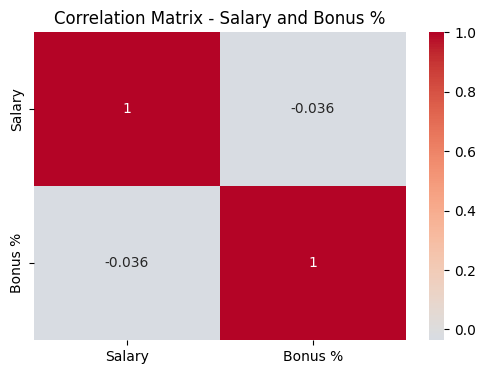

In [17]:
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix - Salary and Bonus %')
plt.show()

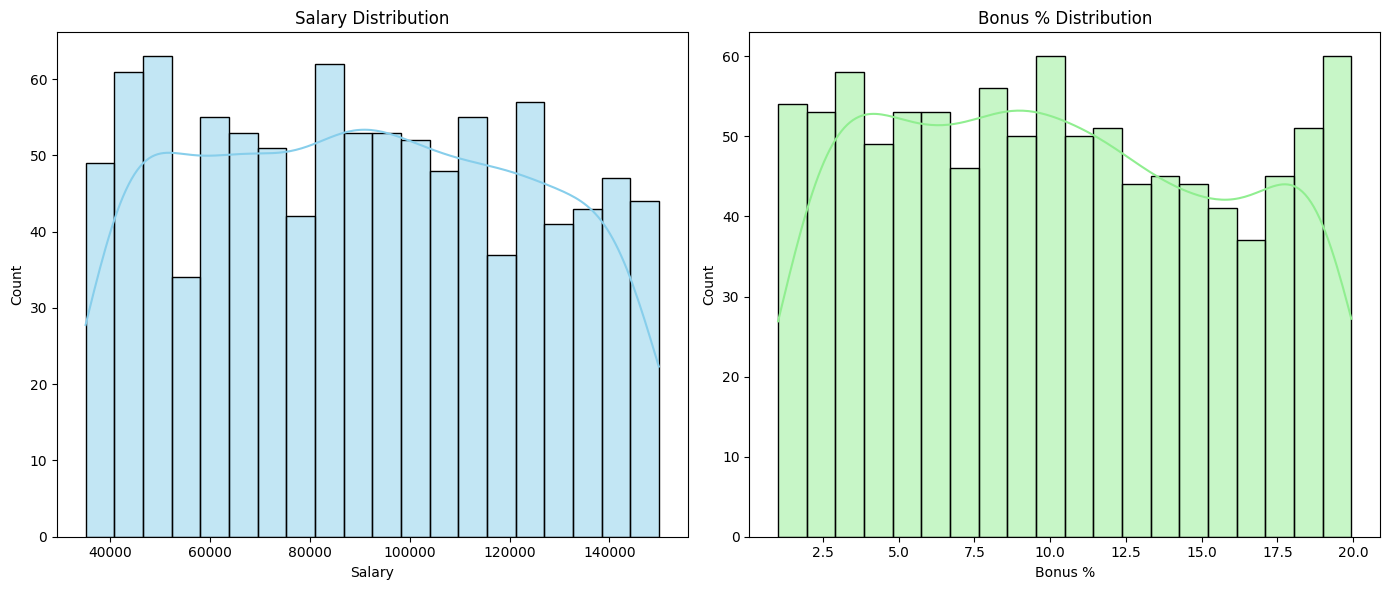

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.histplot(df['Salary'], bins=20, kde=True, ax=axes[0], color="skyblue")
axes[0].set_title("Salary Distribution")
axes[0].set_xlabel("Salary")

sns.histplot(df['Bonus %'], bins=20, kde=True, ax=axes[1], color="lightgreen")
axes[1].set_title("Bonus % Distribution")
axes[1].set_xlabel("Bonus %")

plt.tight_layout()
plt.show()


In [22]:
salary_stats = df['Salary'].describe()
bonus_stats = df['Bonus %'].describe()
salary_stats, bonus_stats

(count      1000.000000
 mean      90662.181000
 std       32923.693342
 min       35013.000000
 25%       62613.000000
 50%       90428.000000
 75%      118740.250000
 max      149908.000000
 Name: Salary, dtype: float64,
 count    1000.000000
 mean       10.207555
 std         5.528481
 min         1.015000
 25%         5.401750
 50%         9.838500
 75%        14.838000
 max        19.944000
 Name: Bonus %, dtype: float64)

In [24]:
# senior Management salary comparison (separating the salaries of senior management vs non-senior management)
senior_mgmt_salaries = df[df['Senior Management'] == True]['Salary'].mean()
non_senior_mgmt_salaries = df[df['Senior Management'] == False]['Salary'].mean()
senior_mgmt_salaries, non_senior_mgmt_salaries

(91552.12710280374, 89638.26451612903)

In [25]:
salary_by_gender = df.groupby('Gender')['Salary'].mean()
salary_by_gender

Gender
Female    90280.515625
Male      91180.669811
Name: Salary, dtype: float64

In [26]:
salary_by_team = df.groupby('Team')['Salary'].mean()
salary_by_seniority = df.groupby('Senior Management')['Salary'].mean()
salary_by_team, salary_by_seniority 

(Team
 Business Development    91866.316832
 Client Services         88957.073826
 Distribution            88500.466667
 Engineering             94269.195652
 Finance                 92219.480392
 Human Resources         90944.527473
 Legal                   89303.613636
 Marketing               90435.591837
 Product                 88665.505263
 Sales                   92173.436170
 Name: Salary, dtype: float64,
 Senior Management
 False    89638.264516
 True     91552.127103
 Name: Salary, dtype: float64)

In [29]:
df['Start Date'] = pd.to_datetime(df['Start Date'], errors='coerce')  
salary_over_time = df.groupby(df['Start Date'].dt.year)['Salary'].mean()
salary_over_time.sort_values(ascending=False)

Start Date
1989    104752.050000
2009    103087.642857
1992    101673.357143
1988     99480.960000
2015     98979.181818
1993     97215.473684
1996     97063.000000
2013     96786.448276
2003     96626.807692
2016     96424.733333
2007     95071.000000
1982     94920.500000
1987     93668.812500
2006     92860.653846
1998     92741.263158
2005     92209.000000
1991     91865.259259
2014     91772.535714
1981     90886.285714
1997     90085.793103
1999     89382.891892
1995     89247.818182
2012     88633.071429
1985     87650.777778
1983     87492.363636
1990     87240.409091
2010     87191.285714
1984     86175.406250
1994     85570.000000
2011     85348.933333
2001     84787.920000
2002     83342.852941
2004     81283.774194
2008     81229.240000
2000     80891.961538
1980     80666.333333
1986     76063.928571
Name: Salary, dtype: float64